# INTROUCTION


To perform the data visualization on a classification dataset and regression dataset is the primary goal of this assignment. I have taken two data sets, one for classification and one for regression

1. Appliances Energy Prediction Dataset (For Regression)
2. Default of Credit Card Client Dataset (For Classification)


# INTROUCTION OF DATA FOR REGRESSION

The data set I chose for regression is appliances energy prediction. It is all about the energy consumption of the appliances used in a low energy building. It contains 19375 instances and 29 attributes. The data is gathered about 10 min in 4.5 months. The temperature levels and the humidity conditions in different rooms of the house was monitered using ZigBee wireless sensor network.

Also the data from the nearest airport weather station has been collected and merged with the data sets using the ddate and time column.

The data has a date attribute indicating the timestamp at which this is recorded, Appliances atribute indicating the energy use of all appliances in the house in Wh, light indicates the total energy with the use of light fixtures in the house, T1-T9 are the temperature values recorded in the rooms. Rh_1 to Rh_9 are the humidity conditions in different rooms.Also the pressure, humidity, visibility , Tdewpoint are columns merged with the help of weather station data. Also two random varibles have been included in the data set. The goal is to remove all the indepenent features and effecitively predict the data

# SOURCE OF DATA

I gathered this dataset from the UCI respository

https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction


# READING THE DATA

I am using the pandas library to read the data set and matplot lib and seaborn to visually represent the data and relationships between them

In [50]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv("energydata_complete.csv", parse_dates=['date'])
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# PREPROCESSING OF THE DATA


<br>Handling the null values and handling the strings are the basic steps to perform to make the data ready for the process and apply the machine learning algorithm . Null values in the data can be checked using the numpy library.<br>

In [52]:
df.isnull()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
np.any(df.isnull())

False

# VISUALIZATION OF THE DATA

<br>As my data do not contain any null values, and any categorical values my pre processing step was easier. To visualise the data I am using bar graphs, scatterplots, violinplots, pointplots and pairplots to represent the relationship between the attributes <br>

In [54]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


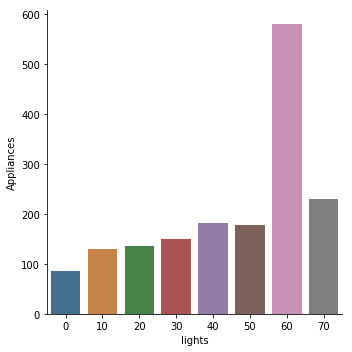

In [55]:
sb.catplot(x="lights", y="Appliances", data=df, saturation=.5, ci=None, kind="bar")

In [56]:
df2=df.groupby(df['date'].dt.strftime('%B'))['Appliances'].sum().sort_values()
df2

date
January     283510
May         362950
February    421550
April       427200
March       432800
Name: Appliances, dtype: int64

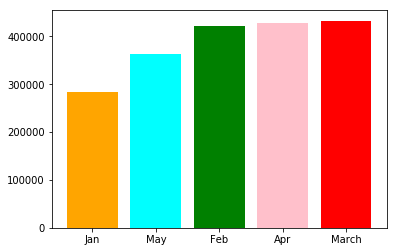

In [57]:
months = ["Jan","May","Feb","Apr","March"]
dataplt = plt.bar(months,df2,color=['orange', 'cyan', 'green', 'pink', 'red'])

In [58]:
df3=df.groupby(df['date'].dt.strftime('%B'))['lights'].sum().sort_values()
df3

date
May          6820
April       10440
January     13800
March       17480
February    26490
Name: lights, dtype: int64

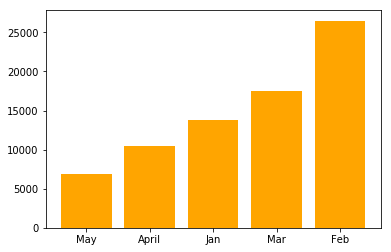

In [59]:
months = ["May","April","Jan","Mar","Feb"]
dataplt = plt.bar(months,df3,color=['orange'])

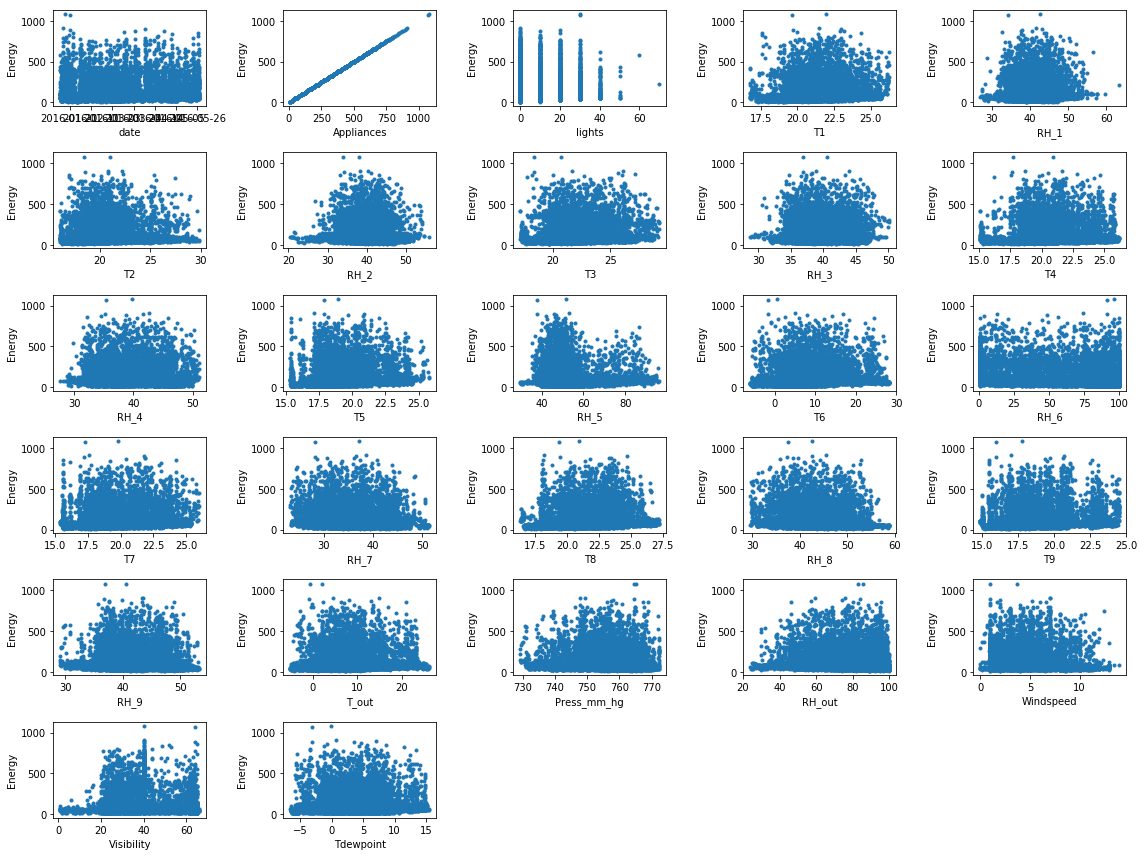

In [60]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(27):
    plt.subplot(6, 5, i+1)
    plt.plot(df.iloc[:,i],df.Appliances, '.')
    plt.xlabel(df.columns.values[i])
    plt.ylabel("Energy")
fig.tight_layout()

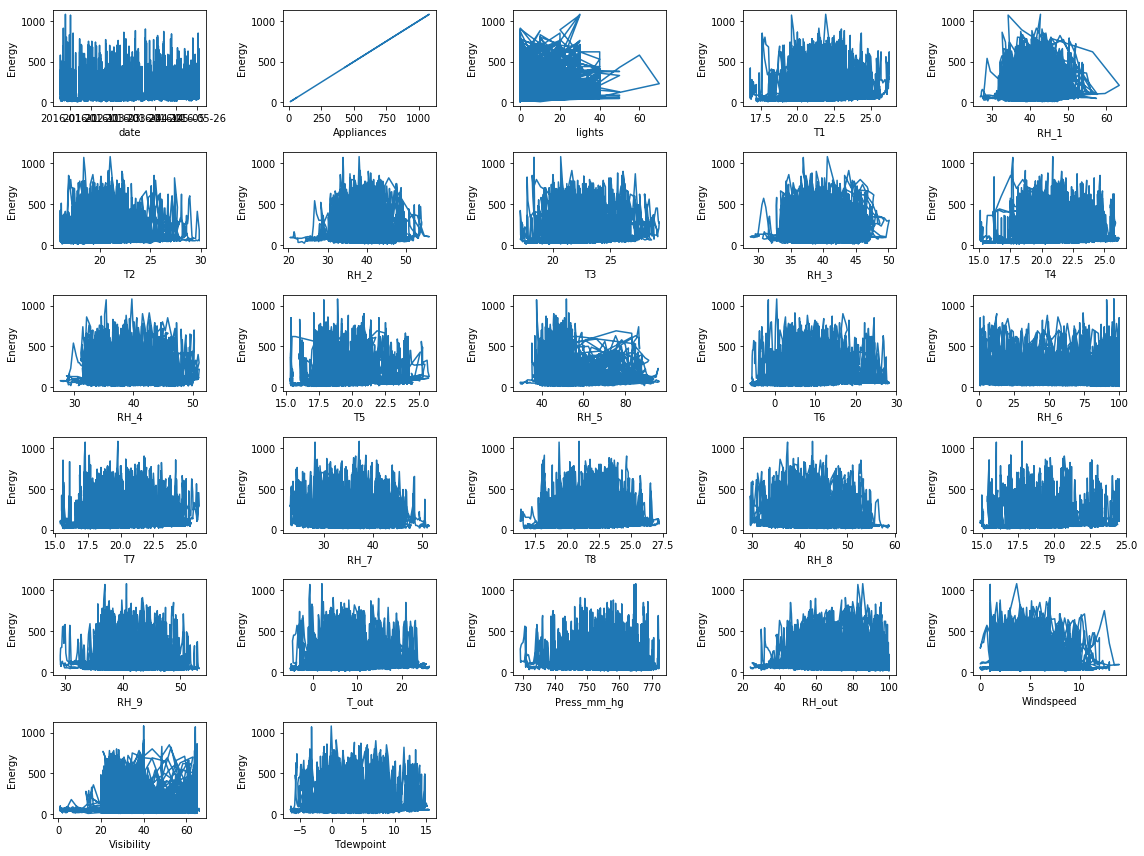

In [61]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(27):
    plt.subplot(6, 5, i+1)
    plt.plot(df.iloc[:,i],df.Appliances)
    plt.xlabel(df.columns.values[i])
    plt.ylabel("Energy")
fig.tight_layout()

In [62]:
bins = [0, 1, 5, 10, 25, 50, 100]
df['Energy'] = pd.cut(df['Appliances'], bins)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Energy
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,"(50, 100]"
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,"(50, 100]"
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,"(25, 50]"
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,"(25, 50]"
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,"(50, 100]"


In [1]:
sb.stripplot(x="Energy",y="RH_out", data=df ,size=4)

NameError: name 'sb' is not defined

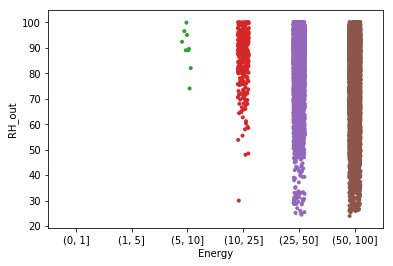

In [63]:
sb.stripplot(x="Energy",y="RH_out", data=df ,size=4)

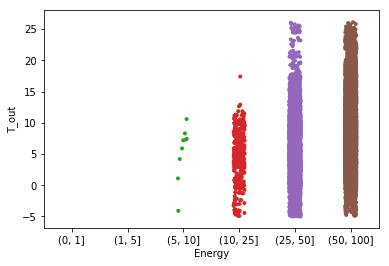

In [64]:
sb.stripplot(x="Energy", y="T_out", data=df, size=4)

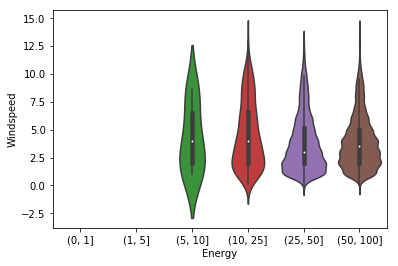

In [65]:
sb.violinplot(x="Energy", y="Windspeed", data=df)

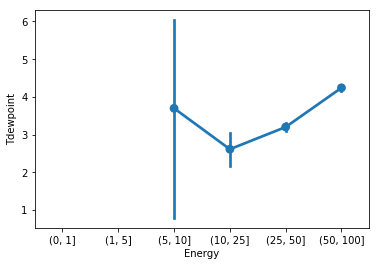

In [66]:
sb.pointplot(x="Energy", y="Tdewpoint", data=df)

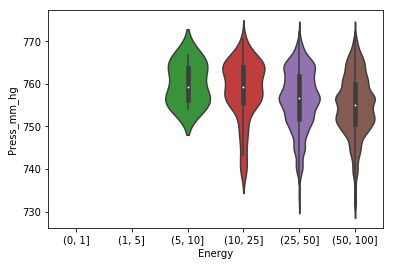

In [67]:
sb.violinplot(x="Energy", y="Press_mm_hg", data=df)

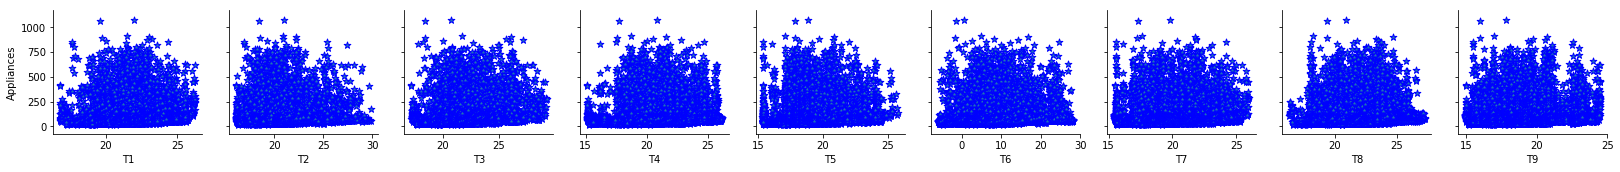

In [68]:
sb.pairplot(df, x_vars=["T1","T2","T3","T4","T5","T6","T7","T8","T9"], y_vars=["Appliances"], markers="*",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

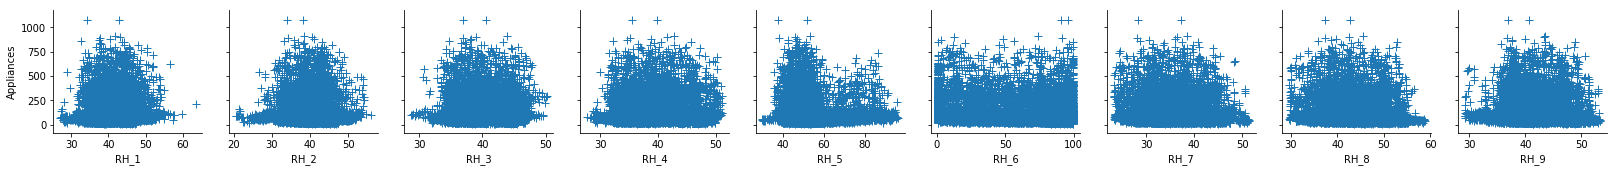

In [69]:
sb.pairplot(df, x_vars=["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"], y_vars=["Appliances"], markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

# PRELIMINARY OBSERVATION

<br>Based on the folowwing visualizations I oberved the following information.By using various models as we progress we will be able to predict the exact value and the variables dependent to calculate the energy usage. <br>

1. The energy usage is very high during the month of march, but there is no specific pattern that cana be observed based on monthly energy distribution, Similarly for the light fixtures distribution during these months Febraury has the highest value.

2. The relation between the usage of lights and the total energy cannot be predicted here as the energy usage increases with lights up to 60 wh and then it started decreasing a little.

3. Based on the pairplots and the scatter plots it is noticeable that as the temperature is increasing the energy usage is increasing

4. Similar plots for the humidity values is plotted and as the humidity increases the energy usage is increasing

5. The values collected from the nearest weather station also had little effect on the energy usage.

6. The column Tdewpoint was constant with the increasing levels of energy and I feel that this need not to be considered for prediction

7. From the violin plots I noticed that as the pressure increases the energy usage was increasing a little

8. Similarly from the violin plot, as the windspeed increases the energy usage was decreasing.

9. The temperature and the humidty of the weather station also had effects on the energy usage and they are directly proportional in this case to the energy usage

8. All the attributes except Tdewpoint and Pressure are the dependent attributes that can be used for predicting the energy use. Also the usage of light fixtures, temperature and humidity values of various rooms play an important role while predicting<br>

# INTROUCTION OF DATA FOR CLASSIFICATION

<br> The dataset I have chosen for classification is Default of credit card clients. The dataset is mainly aimed at the default payment of customers in Taiwan. The estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.
<br>

This data set contains 23 columns and a default payment binary resposne variable to be predicted.There are columns that represents the demographics of the customer like gender, marriage, education and age. The data set also provides the information about the customer's previous payments, bill amounts and payment due's that helps in predicting the default payment. The columns PAY_0, PAY_2, PAY_3, PAY_4,  PAY_5, PAY_6 represents the history of past payments where PAY_0=the repayment status in September,...and PAY_6=the repayment status in April with the values ranging as  -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above respectively. The columns BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 represents the amount of bill statement in dollars. The columns PAY_AMT1,PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6 represnts the amount of previous payments in dollars from Septemper to April <br><br>


# SOURCE OF DATA

I gathered this dataset from the UCI respository

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# READING THE DATA

As my dataset contains only numeric data I have the flexibility to use either numpy or the pandas and I am using the pandas library to read the data set and matplot lib and seaborn to visually represent the data and relationships between them. As my data contains two headers I am dropping one header to effectively represent the data and increase the readability

In [70]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_excel("default of credit card clients.xls", header=[0, 1])
df.columns=df.columns.droplevel(-2)
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# PREPROCESSING OF THE DATA

<br>As illustrated above, cleaning the data, handling the null values and handling the strings are the basic steps to perform and make the data ready for the machine learning algorithm. Null values in the data can be checked using the numpy library.<br><br>

In [72]:
df.isnull()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
np.any(df.isnull())

False

In [74]:
df.describe()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# VISUALIZATION OF THE DATA

<br>As my data do not contain any null values, and any categorical values my pre processing step was easier. To visualise the data I am using bar graphs, scatterplots, violinplots, catplots, countplot and pairplot to represent the relationship between the attributes <br><br>

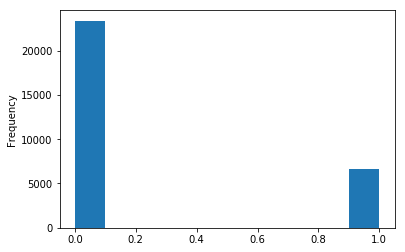

In [75]:
T = df.loc[:, 'default payment next month'].copy()
T
T.plot.hist()

In [76]:
X = df.iloc[:, :-1].copy()
X.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


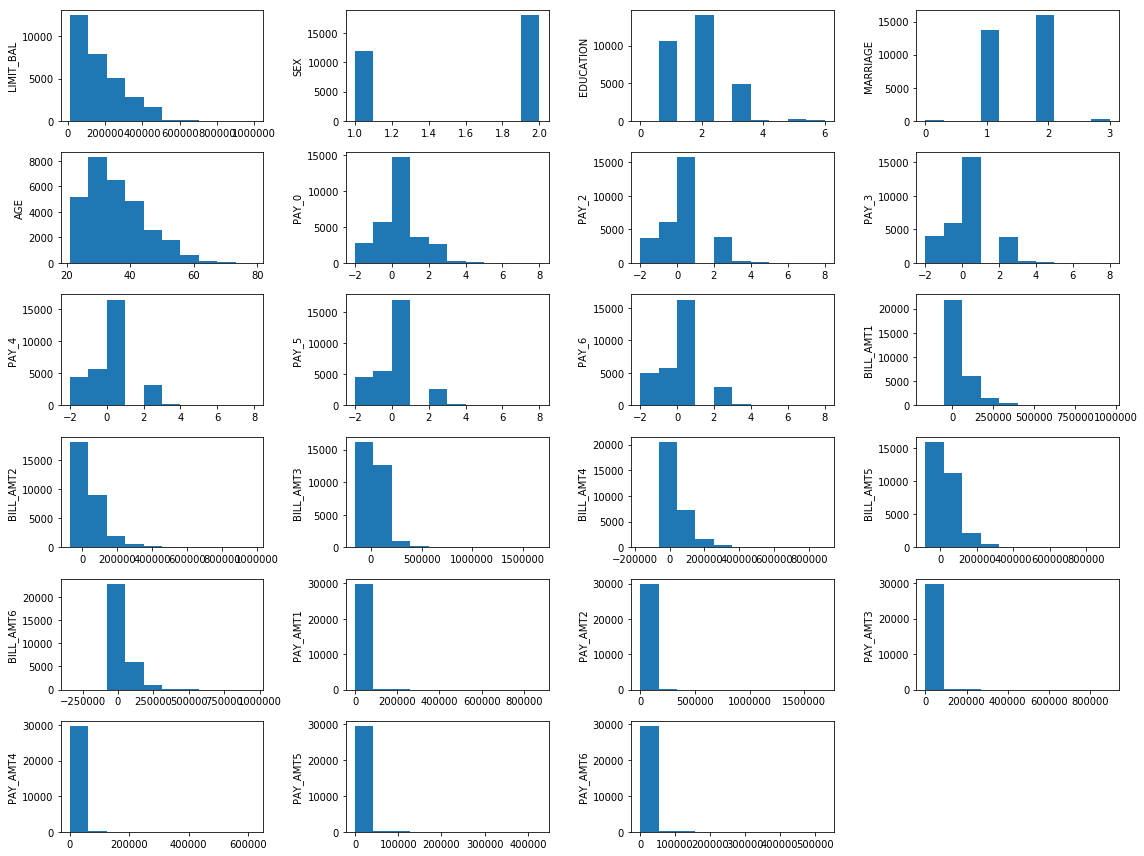

In [77]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(23):
    plt.subplot(6, 4, i+1)
    plt.hist(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

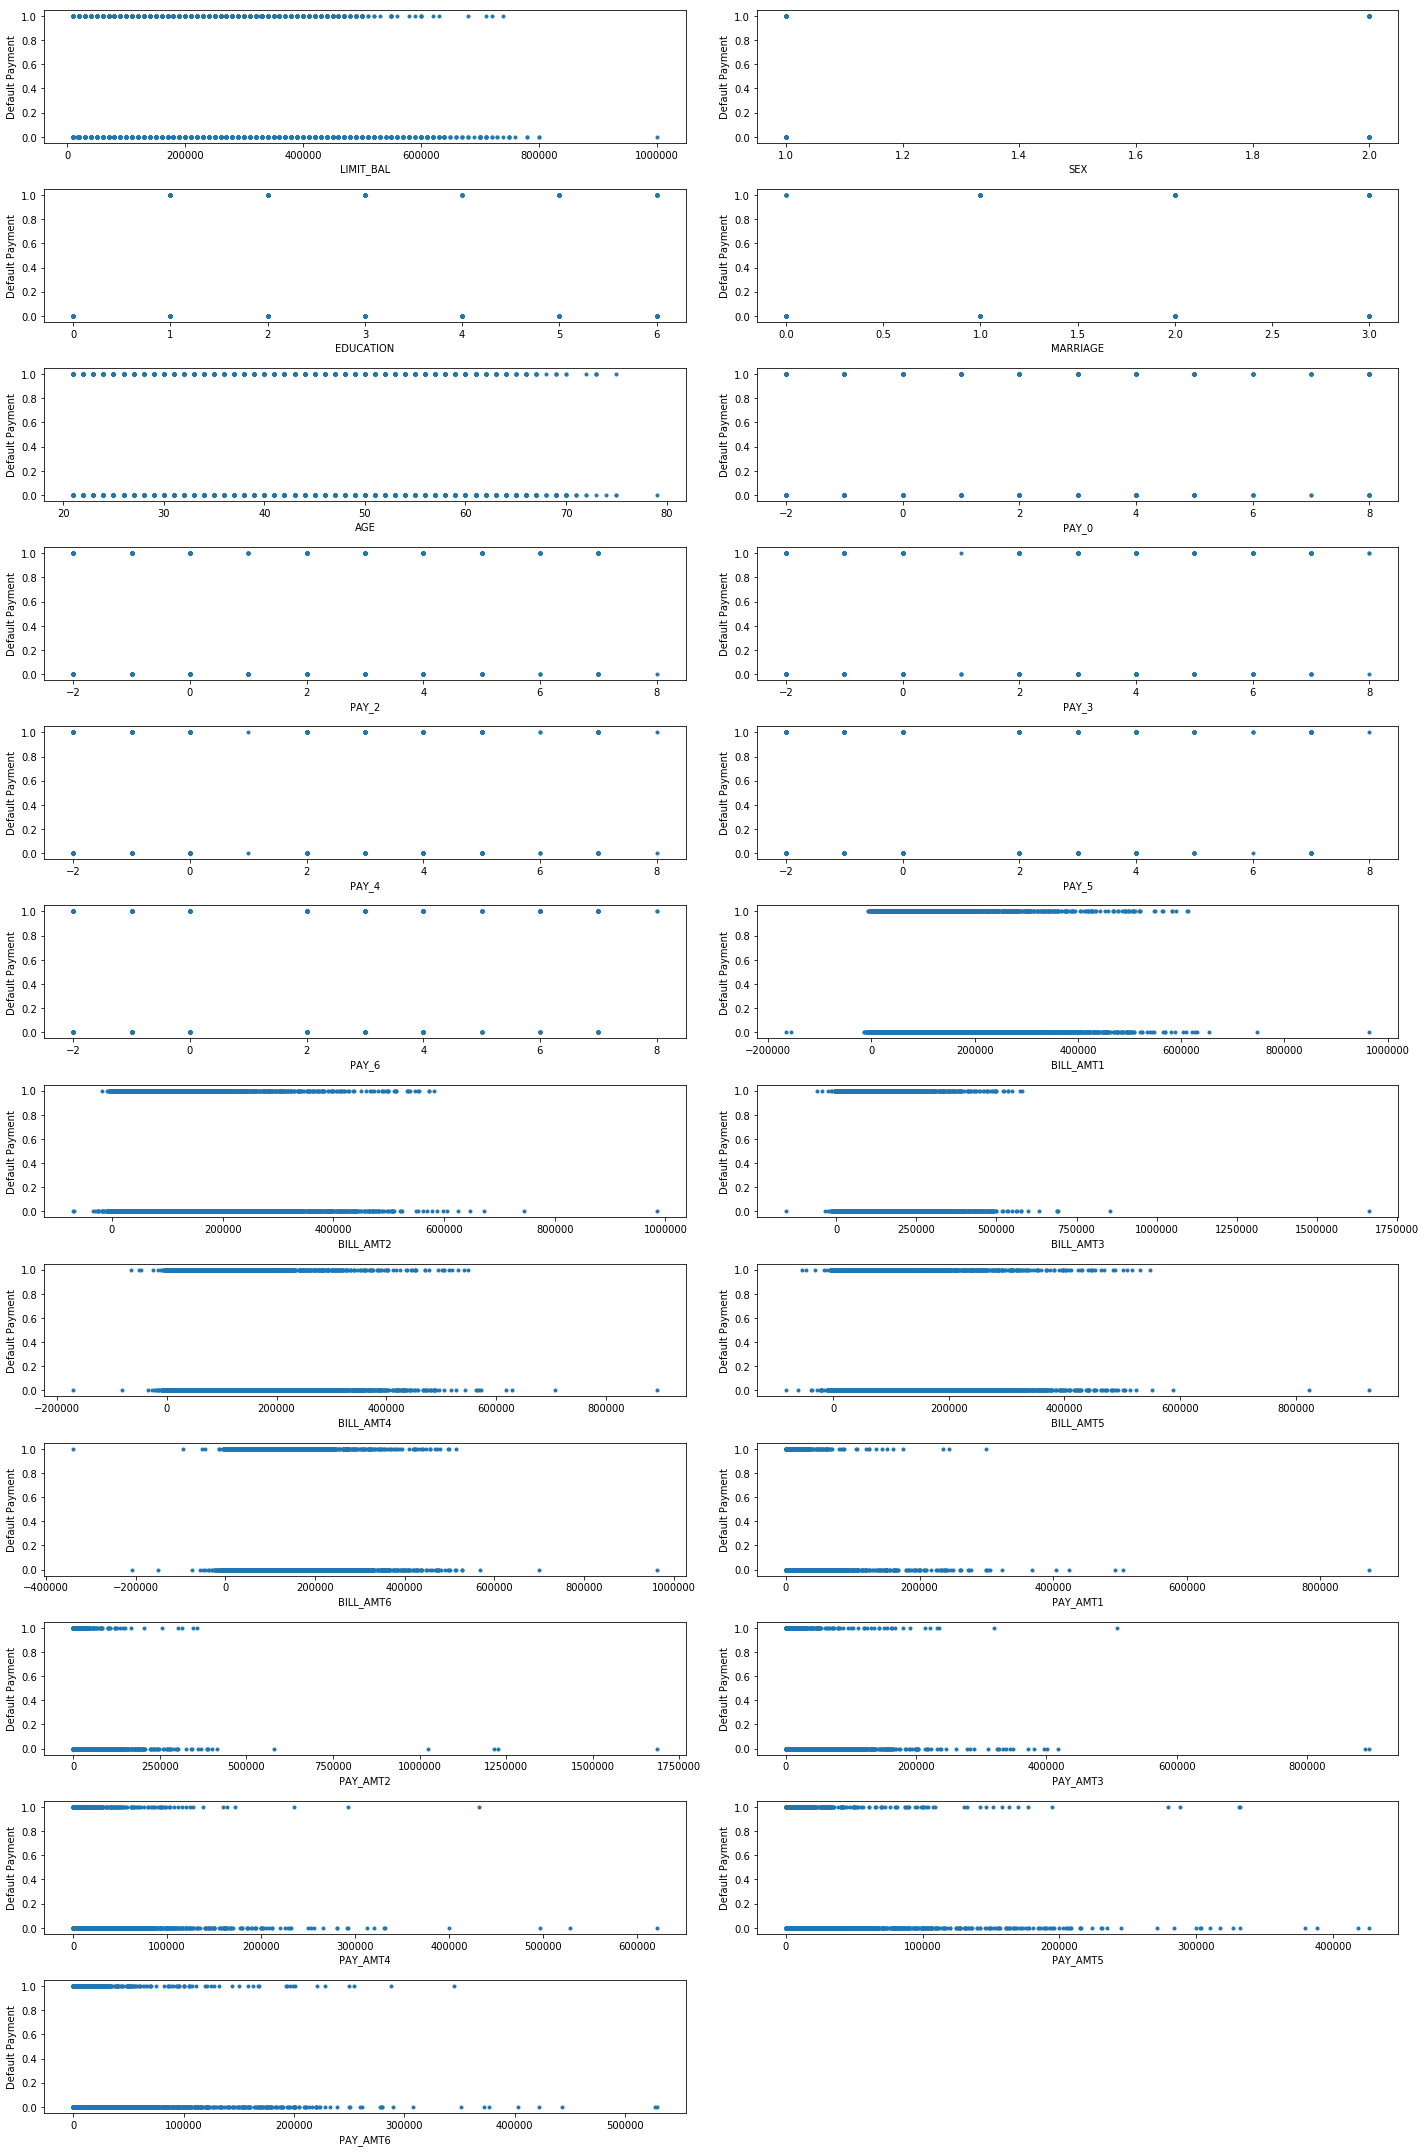

In [78]:
fig = plt.figure(figsize=(20,30))
plt.clf()
for i in range(23):
    plt.subplot(12,2,i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Default Payment')
fig.tight_layout()

In [79]:
df2=df
df2.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [80]:
#df['Y'] = df['Y'].astype(object)
df2['default payment next month']=df2['default payment next month'].replace({0:'No', 1:'Yes'})
#df['SEX'] = df['SEX'].astype(object)
df2.SEX=df2.SEX.replace({1:'Male', 2:'Female'})
df2.MARRIAGE=df2.MARRIAGE.replace({1:'Married', 2:'Single', 3:'Others',0:'Unknown' })
df2.EDUCATION=df2.EDUCATION.replace({1:'Graduate', 2 :'university', 3:'high school' ,4:'others'})
df2.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,Female,university,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
2,120000,Female,university,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
3,90000,Female,university,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,Female,university,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,Male,university,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


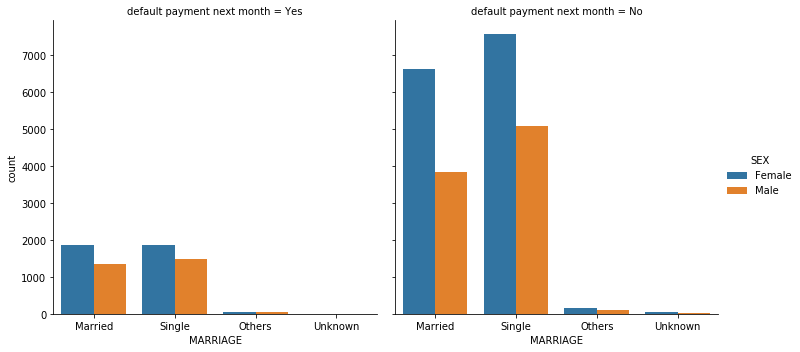

In [81]:
sb.catplot(x="MARRIAGE", hue="SEX", col="default payment next month", data=df2,kind="count" )

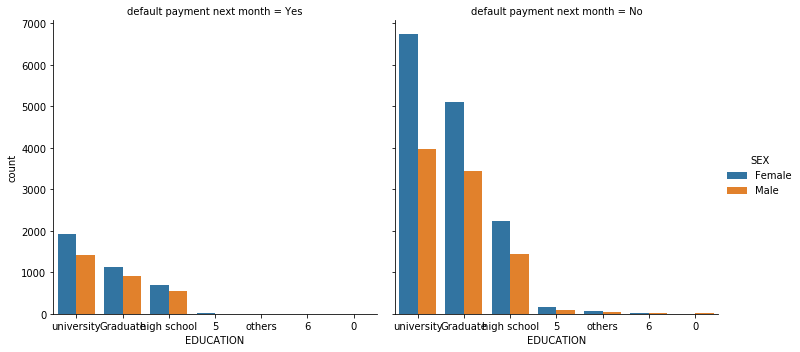

In [82]:
sb.catplot(x="EDUCATION", hue="SEX", col="default payment next month", data=df2,kind="count" )

In [83]:
bins = [0, 1, 5, 10, 20, 35, 50, 100]
df2['Agebins'] = pd.cut(df2['AGE'], bins)
df2.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Agebins
1,20000,Female,university,Married,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,Yes,"(20, 35]"
2,120000,Female,university,Single,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,Yes,"(20, 35]"
3,90000,Female,university,Single,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,No,"(20, 35]"
4,50000,Female,university,Married,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,No,"(35, 50]"
5,50000,Male,university,Married,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,No,"(50, 100]"


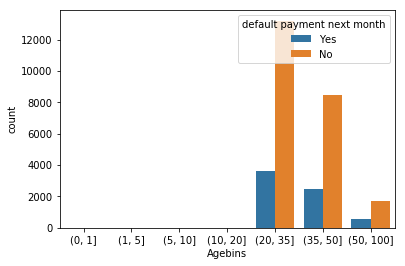

In [84]:
sb.countplot(x="Agebins", hue="default payment next month", data=df2)

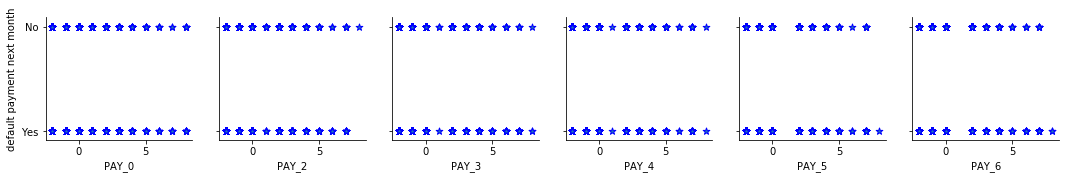

In [85]:
sb.pairplot(df, x_vars=["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"], y_vars=["default payment next month"], markers="*",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

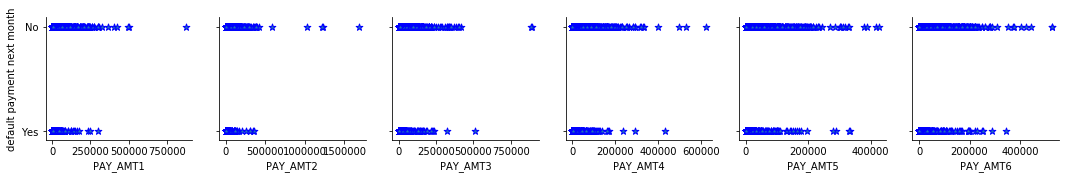

In [86]:
sb.pairplot(df, x_vars=["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"], y_vars=["default payment next month"], markers="*",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

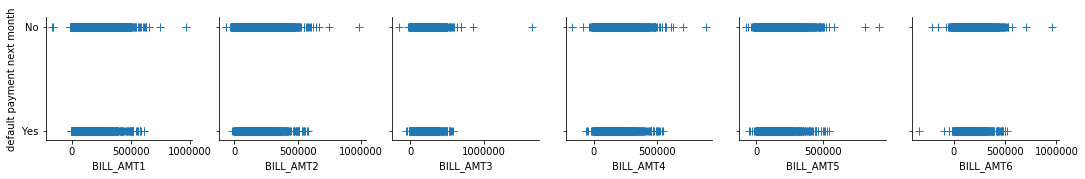

In [87]:
sb.pairplot(df, x_vars=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"], y_vars=["default payment next month"], markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

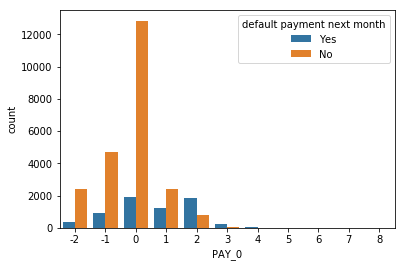

In [88]:
sb.countplot(x="PAY_0", hue="default payment next month", data=df)

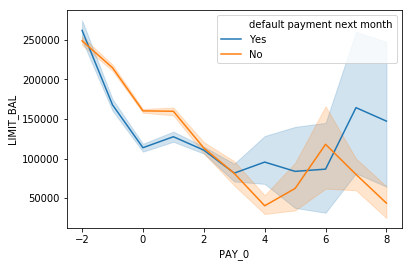

In [89]:
sb.lineplot(x="PAY_0", y="LIMIT_BAL", data=df2, hue="default payment next month")

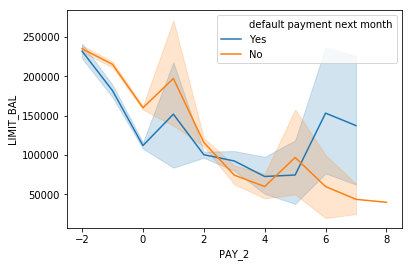

In [90]:
sb.lineplot(x="PAY_2", y="LIMIT_BAL", data=df2, hue="default payment next month")

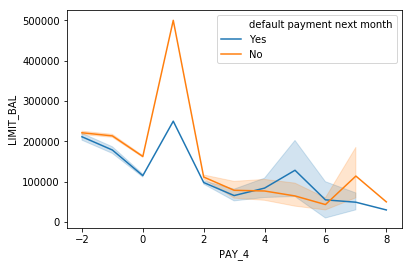

In [95]:
sb.lineplot(x="PAY_4", y="LIMIT_BAL", data=df2, hue="default payment next month")

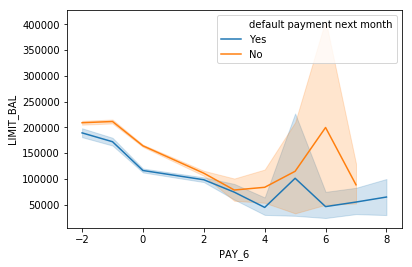

In [96]:
sb.lineplot(x="PAY_6", y="LIMIT_BAL", data=df2, hue="default payment next month")

# PERLIMINARY OBSERVATION

<br> Based on the data illustarted above I noticed the following observations.
1. The total number of default payments on the whole data sets are less and this can viewed on the histogram plotted above
2. The basic demographics on the whole dataset can is visible in the subplots plotted as histograms, which indicates very primary information such as the more number of female and less number of male customers, and the count of customers based on their marital status and education.
3. The scatter graph plotted illustrates that as the balance limit is increasing the default payment was not the option.
4. The Bill amounts had a directly proportional relationship to the default payment which can be noticed in the scatter plots.
5. Catplots are plotted for the demographics marriage anad education labelling them on the x-axis and distinguishing them on the gender for the default payments.
6. It indicates that the default payment was considered by both of the married and single female poulation in the data set
7. Also the university female population has the higher proportion of considering the default payment
8. The countplot plotted with agebins indicate that customers within the age group of 20-35 are more likely to use the default payment
9. The pair plots for the payment amount is representing that from April to September as the amount is increasing there is less likely chance of customer using default payment next month.
10. The bill amount did not seem to have any effect on the default payment
11. The payment history of the customers plotted with the line graph tells us that with the increrasing amount the payment due was maintained correctly and there less chance for the default payment

# CONCLUSION


<br> The prime important concept I learnt was about anaysing the data. Analysing the data for both classification and regression introduced me to the concept of categorical and continuous variables, converting categorical to continuos for data computation purposes and converting the numeric data to categorical for effective visual representation was an interesting task. I faced few challenges with the data grouping, in my regression as it is done based on date. Also with grouping the continuous variables to bins as my data is continuos and large which is disrupting the shapes of graphs. Analyzing what data to group, how to group them, establishing relation between them, identifying the appropriate graph to visually represent that data was the primary goal. Also this introduced me to the world of Python.

# REFERENCES

<br>
https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://python-graph-gallery.com/3-control-color-of-barplots/

https://www.codecademy.com/articles/seaborn-design-i

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://stackoverflow.com/questions/45273731/binning-column-with-python-pandas

https://stackoverflow.com/questions/38463019/grouping-numerical-values-in-pandas

http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/Data%20Visualization.ipynb

<br><br>
